# Proyek Analisis Data: Bike Sharing
- **Nama:** Satria Dewantara
- **Email:** satria.toretto@gmail.com
- **ID Dicoding:** satria_dewantara_HB9G

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan perilaku penyewa sepeda antara "Casual Users" dan "Registered Users"?
- Bagaimana cuaca (var: weathersit) dapat memengaruhi sistem rental sepeda?
- Bagaimana performa perusahaan dalam beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [72]:
day_df = pd.read_csv('/content/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Membaca file CSV untuk data day
- Menampilkan data yang berhasil dibaca
- Variable yang perlu diketahui antara lain:
	- dteday : date
    - instant: record index
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [73]:
hour_df = pd.read_csv('/content/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membaca file CSV untuk data hour
- Menampilkan data yang berhasil dibaca

### Assessing Data

In [74]:
print(day_df.info())
print(day_df.isnull().sum())
print("Jumlah duplikat sebesar",day_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday 

**Insight:**
- variable 'dteday' seharusnya tipe data datetime bukan object
- Tidak ada missing value
- Tidak ada data duplikat

In [75]:
print(hour_df.info())
print(hour_df.isnull().sum())
print("Jumlah duplikat sebesar",hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
instant       0
dteday        0
season      

**Insight:**
- variable 'dteday' seharusnya tipe data datetime bukan object
- Tidak ada missing value
- Tidak ada data duplikat

### Cleaning Data

In [76]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Variable "dteday" berhasil diperbaiki

In [77]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Variable "dteday" berhasil diperbaiki

In [78]:
drop_col = ['temp','atemp', 'hum', 'windspeed', 'instant']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


**Insight:**
- Menghapus variable 'instant', 'temp', 'atemp', 'hum', dan 'windspeed', karena tidak berhubungan dengan pertanyaan bisnis diatas serta cukup diwakilkan dengan variable 'weathersit'

## Exploratory Data Analysis (EDA)

### Explore

In [51]:
user_rentals = day_df[['casual', 'registered', 'cnt']].copy()
user_rentals.agg({
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum'],
    'cnt': ['max', 'min', 'mean', 'sum']
})



,casual,registered,cnt
max,3410.000000,6.946000e+03,8.714000e+03
min,2.000000,2.000000e+01,2.200000e+01
mean,848.176471,3.656172e+03,4.504349e+03
sum,620017.000000,2.672662e+06,3.292679e+06


**Insight:**
- Mengkelompokan data berdasarkan "Casual User" dan "Registered User" serta berdasarkan jumlah total rental sepeda.
- Melakukan 4 komponen statistik sederhana (max, min, rata-rata, dan total).

In [52]:
weather_rentals = day_df[['weathersit', 'cnt']].copy()
weather_rentals.groupby('weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                           
             max  min         mean      sum
weathersit                                 
1           8714  431  4876.786177  2257952
2           8362  605  4035.862348   996858
3           4639   22  1803.285714    37869

**Insight:**
- Mengkelompokan data berdasarkan kondisi cuaca dan jumlah total rental sepeda.
- Melakukan 4 komponen statistik sederhana (max, min, rata-rata, dan total).
- Terlihat bahwa pada umumnya user akan melakukan rental sepeda ketika kondisi cuaca cerah atau berawan sebagian/parsial.

In [53]:
year_rentals = day_df[['yr', 'casual', 'registered', 'cnt']].copy()
year_rentals.groupby('yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum'],
    'casual': ['max', 'min', 'mean', 'sum'],
    'registered': ['max', 'min', 'mean', 'sum']
})

cnt                            casual                           \
     max  min         mean      sum    max min         mean     sum   
yr                                                                    
0   6043  431  3405.761644  1243103   3065   9   677.402740  247252   
1   8714   22  5599.934426  2049576   3410   2  1018.483607  372765   

   registered                             
          max  min         mean      sum  
yr                                        
0        4614  416  2728.358904   995851  
1        6946   20  4581.450820  1676811

**Insight:**
- Mengkelompokan data berdasarkan tahun, "Casual User" dan "Registered User" serta berdasarkan jumlah total rental sepeda.
- Melakukan 4 komponen statistik sederhana (max, min, rata-rata, dan total)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan perilaku penyewa sepeda antara "Casual Users" dan "Registered Users"?

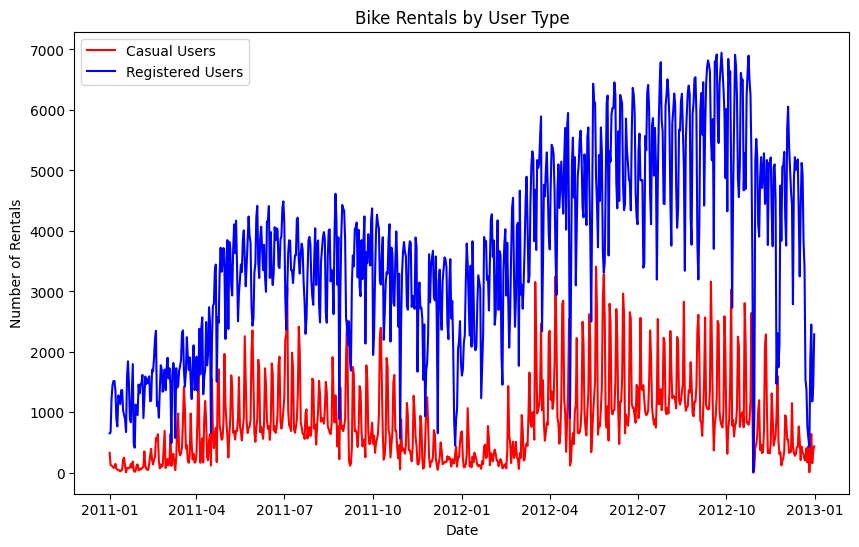

In [58]:
user_rentals = day_df[['dteday', 'casual', 'registered']].copy()

# Membuat plot
plt.figure(figsize=(10,6))
plt.plot(user_rentals['dteday'], user_rentals['casual'], label='Casual Users', color='red')
plt.plot(user_rentals['dteday'], user_rentals['registered'], label='Registered Users', color='blue')

# Menambahkan judul dan keterangan
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.title('Bike Rentals by User Type')
plt.legend()

plt.show()

**Insight:**
- Registered users tentunya berjumlah lebih banyak dari Casual users.
- Registered users memiliki pola sewa yang lebih stabil, hal ini menunjukan kemungkinan kebutuhan perjalanan reguler atau perjalanan sehari-hari.

### Pertanyaan 2: Bagaimana cuaca (var: weathersit) dapat memengaruhi sistem rental sepeda?

<ipython-input-60-423f4c5f0629>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

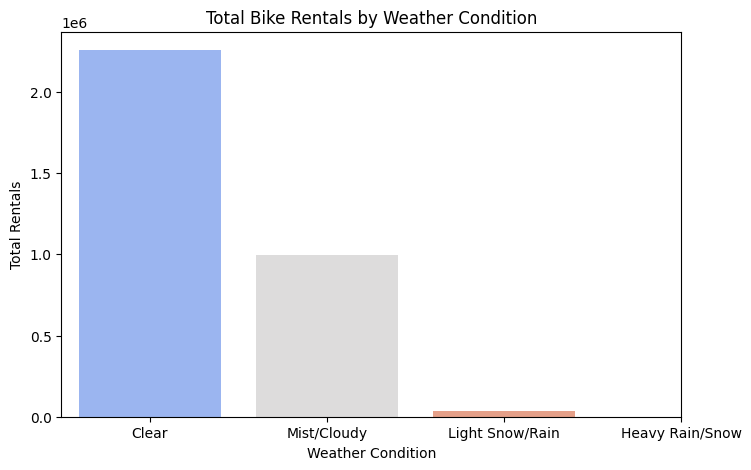

In [60]:
weather_rentals = day_df.groupby('weathersit').agg({'cnt': 'sum'}).reset_index()

# Membuat plot
plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='coolwarm')

# Menambahkan judul dan keterangan
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Weather Condition')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])

plt.show()

**Insight:**
- Ketika cuaca "Clear" atau cerah penggguna rental sepeda terbanyak dibandingkan dengan keadaan cuaca yang lain.
- Terilhat bahwa ketika cuaca hujan besar atau bersalju lebat tidak ada satupun user yang merental sepeda.

### Pertanyaan 3: Bagaimana performa perusahaan dalam beberapa tahun terakhir?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


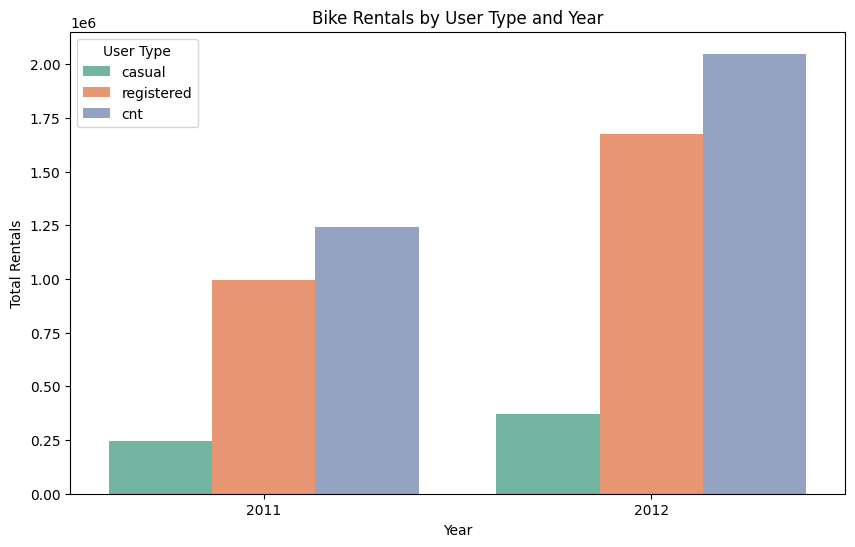

In [67]:
year_rentals = day_df.groupby('yr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Merubah indeks tahun
year_rentals['yr'] = year_rentals['yr'].replace({0: '2011', 1: '2012'})

# Membuat plot
plt.figure(figsize=(10, 6))
year_rentals_melted = year_rentals.melt(id_vars='yr', value_vars=['casual', 'registered', 'cnt'],
                                        var_name='User Type', value_name='Rentals')

sns.barplot(x='yr', y='Rentals', hue='User Type', data=year_rentals_melted, palette='Set2')

# Menambahkan judul dan keterangan
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals by User Type and Year')
plt.legend(title='User Type')

plt.show()

**Insight:**
- Terihat bahwa dari tahun 2011 ke tahun 2012 terjadi kenaikan yang signifikan baik pada casual maupun registered users ataupun secara akumulasi (total rental) yaitu pada variable 'cnt'.
- Registed users memiliki jumlah sewa yang lebih banyak dibandingkan dengan casual users. Hal ini menunjukkan bahwa 'Bike Sharing' mungkin telah berhasil mengubah lebih banyak users menjadi registered users dari tahun 2011 hingga 2012.

## Analisis Lanjutan (Opsional)

<ipython-input-71-ed6e99e4deb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group

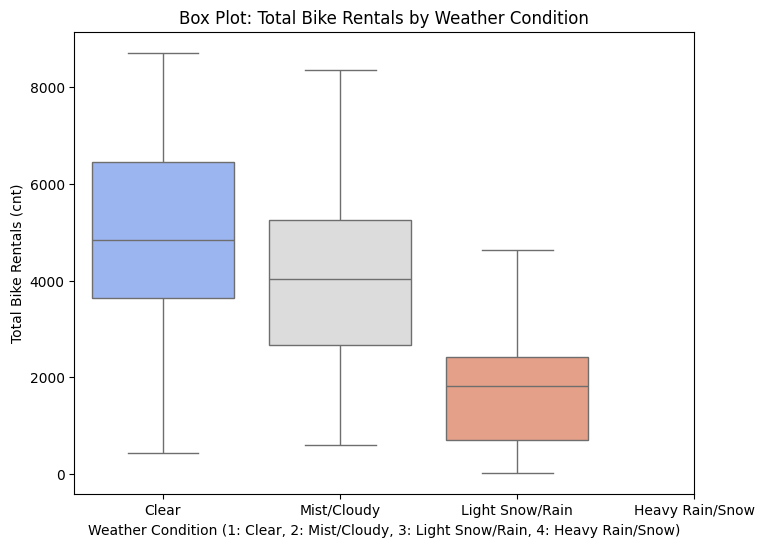

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette='coolwarm')

# Adding labels and title
plt.xlabel('Weather Condition (1: Clear, 2: Mist/Cloudy, 3: Light Snow/Rain, 4: Heavy Rain/Snow)')
plt.ylabel('Total Bike Rentals (cnt)')
plt.title('Box Plot: Total Bike Rentals by Weather Condition')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])

plt.show()


**Insight:**
- Jumlah rata-rata sewa sepeda jauh lebih tinggi pada cuaca cerah atau berawan parsial/sebagian. Secara statistik, hal ini menunjukkan bahwa cuaca cerah merupakan indikator kuat dalam memprediksi peningkatan penyewaan sepeda.
- Interquartile range (IQR) untuk cuaca buruk menunjukkan rendahnya variability dalam sewa, hal ini menunjukkan bahwa cuaca buruk menjadi penentu apakah users akan menyewa sepeda atau tidak.
- Terdapat outlier pada hari-hari cuaca cerah, yang berarti terjadinya 'special event'di mana jumlah sewa jauh di atas normal.

## Conclusion

- Conclution pertanyaan 1: Causual users menunjukkan perilaku penyewaan yang tidak teratur atau musiman. Penggunaan mereka meningkat selama akhir pekan, hari libur, dan cuaca yang mendukung, dengan kata lain lebih cenderung menyewa sepeda untuk bersantai ataupun rekreasi. Sedangkan, registered users memiliki pola penyewaan yang konsisten dan stabil. Mereka kurang terpengaruh oleh cuaca, kemungkinan terkait kebutuhan perjalanan reguler atau perjalanan sehari-hari.

- Conclution pertanyaan 2: Kondisi cuaca memiliki dampak/peran penting dalam sistem rental sepeda. Ketika cuaca cerah menghasilkan jumlah penyewaan tertinggi. Sedangkan ketika kondisi cuaca buruk (kabut, hujan gerimis, salju, atau hujan lebat) menyebabkan penurunan tajam dalam penyewaan. Penurunan dapat diprediksi dalam penyewaan sepeda selama cuaca buruk terjadi menunjukkan bahwa kondisi yang tidak menguntungkan sangat menghambat casual users dan registered untuk menyewa sepeda. Sebaliknya,cuaca cerah merupakan indikator kuat untuk memprediksi kenaikan rental sepeda.

- Conclution pertanyaan 3:Perusahaan telah menunjukkan pertumbuhan yang positif dari tahun ke tahun (YoY), khususnya antara tahun 2011 dan 2012
banyaknya total jumlah penyewaan sepeda telah meningkat secara signifikan, mencerminkan adanya permintaan pasar untuk layanan tersebut. Jumlah registered users juga telah berkembang, sebagai penyumbah sebagian besar penyewaan dan menunjukkan keberhasilan sistem dalam menciptakan kelompok users yang konsisten. Peningkatan casual users berarti perusahaan dapat menarik casual users meskipun volatilitas dalam penyewaan sepeda. Kinerja keseluruhan ini menunjukkan bahwa perusahaan tersebut berkembang dan memperkuat kehadirannya di pasar.